# Main task: cleaning data for ML Algorithms

Author: Sunwoo Choi

## Data 
Dataset Repository URL: https://github.com/kkehoe1985/ga_data_science_final_project/blob/master/combined_data.csv

Raw data URL: https://raw.githubusercontent.com/kkehoe1985/ga_data_science_final_project/master/combined_data.csv

Thanks to @kkehoe1985 for providing data

In [ ]:
# import data
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/kkehoe1985/ga_data_science_final_project/master/combined_data.csv')

# Replace bad data
df.replace({'Population':r'^<bound[\s\n\t0-9:,>.a-zA-Z]*'}, {'Population':'0'}, regex=True, inplace=True)

In [ ]:
# Explore data

dfState = []
dfCounty = []

for ele in df['fips']:
  strEle = '0'+ str(ele) if len(str(ele)) is 4 else str(ele)
  dfState.append(strEle[:2])
  dfCounty.append(strEle[2:])

df['State'] = dfState
df['County'] = dfCounty

df[['fips','State','County']]

,fips,State,County
0,2013,02,013
1,2016,02,016
2,2020,02,020
3,2050,02,050
4,2060,02,060
...,...,...,...
3140,56037,56,037
3141,56039,56,039
3142,56041,56,041
3143,56043,56,043


In [ ]:

eduSelect = ['less than high school diploma', 'high school diploma', 'college', 'bachelor or higher' ]
dfEducation = []

def findMaxIdx(row):
  if row[2] == max(row[2:6]):
    return 0
  elif row[3] == max(row[2:6]):
    return 1
  elif row[4] == max(row[2:6]):
    return 2
  elif row[5] == max(row[2:7]):
    return 3
  else:
    return 4

for index, row in df.iterrows():
  dfEducation.append(eduSelect[findMaxIdx(row)])

df['Education'] = dfEducation

df['Education']

0       high school diploma
1       high school diploma
2                   college
3       high school diploma
4                   college
               ...         
3140                college
3141     bachelor or higher
3142    high school diploma
3143                college
3144                college
Name: Education, Length: 3145, dtype: object

In [ ]:
# Create Religion column that select most highest value from religion related columns

df['Religion'] = df[['Amish','Buddhist','Catholic','Christian Generic','Eastern Orthodox',
                     'Hindu','Jewish','Mainline Christian','Mormon','Muslim','Non-Catholic Christian','Other',
                     'Other Misc','Other Christian','Pentecostal / Charismatic','Protestant Denomination','Zoroastrian']].idxmax(axis=1)


In [ ]:
# Combine age related columns into 3 columns

df['Old'] = df['65-69_rate'] + df['70-74_rate'] + df['75-79_rate'] + df['80-84_rate'] + df['85+_rate']
df['Young'] = df['0-4_rate'] + df['5-9_rate'] + df['10-14_rate'] + df['15-19_rate']
df['Adult'] = df['20-24_rate'] + df['25-29_rate']+ df['30-34_rate'] + df['35-39_rate'] + df['40-44_rate'] + df['45-49_rate'] + df['50-54_rate'] + df['55-59_rate'] + df['60-64_rate']

In [ ]:
df['EthnicMale'] = df[['WHITE_MALE_rate','BLACK_MALE_rate','NATIVE_AMERICAN_MALE_rate','ASIAN_MALE_rate','HAWAIIAN_PACIFIC_MALE_rate','MULTI_MALE_rate']].idxmax(axis=1)
df['EthnicFemale'] = df[['WHITE_FEMALE_rate','BLACK_FEMALE_rate','NATIVE_AMERICAN_FEMALE_rate','ASIAN_FEMALE_rate','HAWAIIAN_PACIFIC_FEMALE_rate','MULTI_FEMALE_rate']].idxmax(axis=1)

em = []
ef = []
for index, row in df.iterrows():
  em.append(row['EthnicMale'].split('_')[0].title())
  ef.append(row['EthnicFemale'].split('_')[0].title())

df['EthnicMale'] = em
df['EthnicFemale'] =ef

In [ ]:
# Delete unnecessary columns from data frame

newDf = df.drop(['fips','Amish','Percent of adults with less than a high school diploma, 2011-2015','Percent of adults with a high school diploma only, 2011-2015','Percent of adults completing some college or associate\'s degree, 2011-2015',
                 'Percent of adults with a bachelor\'s degree or higher, 2011-2015','Buddhist','Catholic','Christian Generic','Eastern Orthodox','Hindu','Jewish','Mainline Christian','Mormon','Muslim',
                 'Non-Catholic Christian','Other','Other Christian','Other Misc','Pentecostal / Charismatic','Protestant Denomination','Zoroastrian','PovertyUnder18Pct2014',
                 'Deep_Pov_Children','Housing units','Area in square miles - Water area','Area in square miles - Land area','Density per square mile of land area - Housing units',
                 '0-4_rate','5-9_rate','10-14_rate','15-19_rate','20-24_rate','25-29_rate','30-34_rate','35-39_rate','40-44_rate','45-49_rate','50-54_rate','55-59_rate','60-64_rate',
                 '65-69_rate','70-74_rate','75-79_rate','80-84_rate','85+_rate','WHITE_MALE_rate',	'WHITE_FEMALE_rate',	'BLACK_MALE_rate',	'BLACK_FEMALE_rate',
                 'NATIVE_AMERICAN_MALE_rate',	'NATIVE_AMERICAN_FEMALE_rate',	'ASIAN_MALE_rate',	'ASIAN_FEMALE_rate',	'HAWAIIAN_PACIFIC_MALE_rate',	'HAWAIIAN_PACIFIC_FEMALE_rate',	'MULTI_MALE_rate',
                 'MULTI_FEMALE_rate','WHITE_rate',	'BLACK_rate',	'NATIVE_AMERICAN_rate',	'HAWAIIAN_PACIFIC_rate',	'MULTI_rate'],
                axis=1)
newDf

,votes,Unemployment_rate_2015,POP_ESTIMATE_2015,MedHHInc2014,PerCapitaInc,PovertyAllAgesPct2014,Deep_Pov_All,Population,Area in square miles - Total area,Density per square mile of land area - Population,age_total_pop,TOT_MALE_rate,TOT_FEMALE_rate,voter_turnout_rate,Democrat,State,County,Education,Religion,Old,Young,Adult,EthnicMale,EthnicFemale
0,7471,3.2,3341.0,55462.0,27122.0,16.2,4.933009,3141,15009.86,0.4,1143123.501,0.483100,0.498326,2.236157,0,02,013,high school diploma,Other Misc,0.096915,0.250370,0.584595,White,White
1,7471,3.8,5702.0,68387.0,32700.0,9.9,4.287817,5561,14116.44,1.3,1143123.501,0.483100,0.498326,1.310242,0,02,016,high school diploma,Catholic,0.096915,0.250370,0.584595,White,White
2,7471,5.0,298695.0,75200.0,36508.0,10.0,3.903225,291826,1961.00,171.2,1143123.501,0.483100,0.498326,0.025012,0,02,020,college,Christian Generic,0.096915,0.250370,0.584595,White,White
3,7471,14.4,17946.0,45808.0,18875.0,23.8,8.644846,17013,45504.21,0.4,1143123.501,0.483100,0.498326,0.416304,0,02,050,high school diploma,Catholic,0.096915,0.250370,0.584595,White,White
4,7471,9.2,892.0,75364.0,37012.0,9.5,4.868154,997,887.56,2.0,1143123.501,0.483100,0.498326,8.375561,0,02,060,college,Catholic,0.096915,0.250370,0.584595,White,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,16661,4.6,44626.0,72604.0,30500.0,9.8,5.959690,43806,10491.09,4.2,44626.000,0.518554,0.481446,0.373347,0,56,037,college,Catholic,0.060077,0.300968,0.607045,White,White
3141,12176,3.8,23125.0,75348.0,43628.0,7.7,3.176056,21294,4216.33,5.3,23125.000,0.516324,0.483676,0.526530,1,56,039,bachelor or higher,Catholic,0.076151,0.212065,0.668584,White,White
3142,8053,4.9,20822.0,56800.0,25778.0,10.0,6.860387,21118,2087.57,10.1,20822.000,0.502978,0.497022,0.386754,0,56,041,high school diploma,Mormon,0.071367,0.320094,0.565364,White,White
3143,3715,4.0,8328.0,50802.0,26922.0,12.6,5.578363,8533,2242.70,3.8,8328.000,0.509246,0.490754,0.446085,0,56,043,college,Christian Generic,0.141811,0.252882,0.538785,White,White


In [ ]:
# Rename the headers

newDf.rename(columns={"votes": "Votes","Unemployment_rate_2015":"UnemploymentRate2015","POP_ESTIMATE_2015":"PopEstimate2015","Deep_Pov_All":"DeepPovAll",
                      "Area in square miles - Total area":"TotalArea","Density per square mile of land area - Population":"PopDensity","age_total_pop":"AgeTotalPop","TOT_MALE_rate":"MaleRate",
                      "TOT_FEMALE_rate":"FemaleRate","voter_turnout_rate":"TurnoutRate"},
             inplace=True)
newDf

,Votes,UnemploymentRate2015,PopEstimate2015,MedHHInc2014,PerCapitaInc,PovertyAllAgesPct2014,DeepPovAll,Population,TotalArea,PopDensity,AgeTotalPop,MaleRate,FemaleRate,TurnoutRate,Democrat,State,County,Education,Religion,Old,Young,Adult,EthnicMale,EthnicFemale
0,7471,3.2,3341.0,55462.0,27122.0,16.2,4.933009,3141,15009.86,0.4,1143123.501,0.483100,0.498326,2.236157,0,02,013,high school diploma,Other Misc,0.096915,0.250370,0.584595,White,White
1,7471,3.8,5702.0,68387.0,32700.0,9.9,4.287817,5561,14116.44,1.3,1143123.501,0.483100,0.498326,1.310242,0,02,016,high school diploma,Catholic,0.096915,0.250370,0.584595,White,White
2,7471,5.0,298695.0,75200.0,36508.0,10.0,3.903225,291826,1961.00,171.2,1143123.501,0.483100,0.498326,0.025012,0,02,020,college,Christian Generic,0.096915,0.250370,0.584595,White,White
3,7471,14.4,17946.0,45808.0,18875.0,23.8,8.644846,17013,45504.21,0.4,1143123.501,0.483100,0.498326,0.416304,0,02,050,high school diploma,Catholic,0.096915,0.250370,0.584595,White,White
4,7471,9.2,892.0,75364.0,37012.0,9.5,4.868154,997,887.56,2.0,1143123.501,0.483100,0.498326,8.375561,0,02,060,college,Catholic,0.096915,0.250370,0.584595,White,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,16661,4.6,44626.0,72604.0,30500.0,9.8,5.959690,43806,10491.09,4.2,44626.000,0.518554,0.481446,0.373347,0,56,037,college,Catholic,0.060077,0.300968,0.607045,White,White
3141,12176,3.8,23125.0,75348.0,43628.0,7.7,3.176056,21294,4216.33,5.3,23125.000,0.516324,0.483676,0.526530,1,56,039,bachelor or higher,Catholic,0.076151,0.212065,0.668584,White,White
3142,8053,4.9,20822.0,56800.0,25778.0,10.0,6.860387,21118,2087.57,10.1,20822.000,0.502978,0.497022,0.386754,0,56,041,high school diploma,Mormon,0.071367,0.320094,0.565364,White,White
3143,3715,4.0,8328.0,50802.0,26922.0,12.6,5.578363,8533,2242.70,3.8,8328.000,0.509246,0.490754,0.446085,0,56,043,college,Christian Generic,0.141811,0.252882,0.538785,White,White


In [ ]:
# Normalize data

pop = newDf['Population'].astype(float).to_numpy()
pop = (pop-pop.mean())/pop.std()
newDf['NomalizePopulation'] = pop

medH = newDf['MedHHInc2014'].astype(float).to_numpy()
medH = (medH-medH.mean())/medH.std()
newDf['NomalizeMedHHInc2014'] = medH

perC = newDf['PerCapitaInc'].astype(float).to_numpy()
perC = (perC-perC.mean())/perC.std()
newDf['NomalizePerCapitaInc'] = perC

popEs = newDf['PopEstimate2015'].astype(float).to_numpy()
popEs = (popEs-popEs.mean())/popEs.std()
newDf['NomalizePopEstimate2015'] = popEs

totalArea = newDf['TotalArea'].astype(float).to_numpy()
totalArea = (totalArea-totalArea.mean())/totalArea.std()
newDf['NomalizeToalArea'] = totalArea

popDen = newDf['PopDensity'].astype(float).to_numpy()
popDen = (popDen-popDen.mean())/popDen.std()
newDf['NomalizePopDensity'] = popDen

newDf['UnemploymentRate2015'] = newDf['UnemploymentRate2015'].astype(float)/100
newDf['PovertyAllAgesPct2014'] = newDf['PovertyAllAgesPct2014'].astype(float)/100
newDf['TurnoutRate'] = newDf['TurnoutRate'].astype(float)/100
newDf['DeepPovAll'] = newDf['DeepPovAll'].astype(float)/100
newDf

,Votes,UnemploymentRate2015,PopEstimate2015,MedHHInc2014,PerCapitaInc,PovertyAllAgesPct2014,DeepPovAll,Population,TotalArea,PopDensity,AgeTotalPop,MaleRate,FemaleRate,TurnoutRate,Democrat,State,County,Education,Religion,Old,Young,Adult,EthnicMale,EthnicFemale,NomalizePopulation,NomalizeMedHHInc2014,NomalizePerCapitaInc,NomalizePopEstimate2015,NomalizeToalArea,NomalizePopDensity
0,7471,0.032,3341.0,55462.0,27122.0,0.162,0.049330,3141,15009.86,0.4,1143123.501,0.483100,0.498326,0.022362,0,02,013,high school diploma,Other Misc,0.096915,0.250370,0.584595,White,White,-0.303817,0.687669,0.536632,-0.302990,3.607604,-0.151766
1,7471,0.038,5702.0,68387.0,32700.0,0.099,0.042878,5561,14116.44,1.3,1143123.501,0.483100,0.498326,0.013102,0,02,016,high school diploma,Catholic,0.096915,0.250370,0.584595,White,White,-0.296080,1.756284,1.515032,-0.295860,3.374070,-0.151244
2,7471,0.050,298695.0,75200.0,36508.0,0.100,0.039032,291826,1961.00,171.2,1143123.501,0.483100,0.498326,0.000250,0,02,020,college,Christian Generic,0.096915,0.250370,0.584595,White,White,0.619196,2.319570,2.182969,0.588905,0.196708,-0.052741
3,7471,0.144,17946.0,45808.0,18875.0,0.238,0.086448,17013,45504.21,0.4,1143123.501,0.483100,0.498326,0.004163,0,02,050,high school diploma,Catholic,0.096915,0.250370,0.584595,White,White,-0.259464,-0.110505,-0.909921,-0.258886,11.578651,-0.151766
4,7471,0.092,892.0,75364.0,37012.0,0.095,0.048682,997,887.56,2.0,1143123.501,0.483100,0.498326,0.083756,0,02,060,college,Catholic,0.096915,0.250370,0.584595,White,White,-0.310672,2.333129,2.271372,-0.310385,-0.083883,-0.150838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,16661,0.046,44626.0,72604.0,30500.0,0.098,0.059597,43806,10491.09,4.2,44626.000,0.518554,0.481446,0.003733,0,56,037,college,Catholic,0.060077,0.300968,0.607045,White,White,-0.173799,2.104938,1.129145,-0.178319,2.426424,-0.149562
3141,12176,0.038,23125.0,75348.0,43628.0,0.077,0.031761,21294,4216.33,5.3,23125.000,0.516324,0.483676,0.005265,1,56,039,bachelor or higher,Catholic,0.076151,0.212065,0.668584,White,White,-0.245777,2.331807,3.431841,-0.243247,0.786238,-0.148925
3142,8053,0.049,20822.0,56800.0,25778.0,0.100,0.068604,21118,2087.57,10.1,20822.000,0.502978,0.497022,0.003868,0,56,041,high school diploma,Mormon,0.071367,0.320094,0.565364,White,White,-0.246339,0.798293,0.300889,-0.250201,0.229792,-0.146142
3143,3715,0.040,8328.0,50802.0,26922.0,0.126,0.055784,8533,2242.70,3.8,8328.000,0.509246,0.490754,0.004461,0,56,043,college,Christian Generic,0.141811,0.252882,0.538785,White,White,-0.286577,0.302389,0.501551,-0.287930,0.270343,-0.149794


In [ ]:


population = newDf['Population'].astype(float).to_numpy()
populationMean = population.mean()
populationSD = population.std()

populationEstimate = newDf['PopEstimate2015'].astype(float).to_numpy()
populationEstimateMean = populationEstimate.mean()
populationEstimateSD = populationEstimate.std()

print("poulation mean:",populationMean)
print("population standard deviation:", populationSD)
print("population estimation of 2015:",populationEstimateMean)
print("population estimation of 2015:", populationEstimateSD)

corr = np.corrcoef(population, y=populationEstimate)
print("correlation matrix: \n",corr)

# IQR, Quartiles, Median refereced from https://www.geeksforgeeks.org/interquartile-range-and-quartile-deviation-using-numpy-and-scipy/

perCapitaInc = newDf['PerCapitaInc'].astype(float).to_numpy()

perCapQ1 = np.percentile(perCapitaInc, 25, interpolation = 'midpoint')
perCapQ3 = np.percentile(perCapitaInc, 75, interpolation = 'midpoint')
perCapMedian = np.percentile(perCapitaInc, 50, interpolation = 'midpoint')
perCapIQR = perCapQ3 - perCapQ1

povertyAllAgesPct = newDf['PovertyAllAgesPct2014'].astype(float).to_numpy()

povertyAllAgesPctQ1 = np.percentile(povertyAllAgesPct, 25, interpolation = 'midpoint')
povertyAllAgesPctQ3 = np.percentile(povertyAllAgesPct, 75, interpolation = 'midpoint')
povertyAllAgesPctMedian = np.percentile(povertyAllAgesPct, 50, interpolation = 'midpoint')
povertyAllAgesPctIQR = povertyAllAgesPctQ3 - povertyAllAgesPctQ1

print("PerCapitaInc Median:",perCapMedian)
print("PerCapitaInc Q1:",perCapQ1)
print("PerCapitaInc Q3:",perCapQ3)
print("PerCapitaInc IQR:",perCapIQR)

print("PerCapitaInc Median:",povertyAllAgesPctMedian)
print("PerCapitaInc Q1:",povertyAllAgesPctQ1)
print("PerCapitaInc Q3:",povertyAllAgesPctQ3)
print("PerCapitaInc IQR:",povertyAllAgesPctIQR)

freqDic = {}
ethnicMale = newDf['EthnicMale'].to_numpy()
religion = newDf['Religion'].to_numpy()

maleAndReligion = np.array([ethnicMale, religion])
for idx in range(len(maleAndReligion[0])):
  freqDic[(maleAndReligion[0][idx], maleAndReligion[1][idx])] = freqDic[(maleAndReligion[0][idx], maleAndReligion[1][idx])] + 1 if (maleAndReligion[0][idx], maleAndReligion[1][idx]) in freqDic else 1
modeMaleReligion = ()
curMax = 0
for key, value in freqDic.items():
  if curMax < value:
    modeMaleReligion = key
    curMax = value
print("The mode combined ethnic male and religion is ",modeMaleReligion)

poulation mean: 98163.95548489667
population standard deviation: 312763.60579562176
population estimation of 2015: 103677.06559618442
population estimation of 2015: 331153.5211614969
correlation matrix: 
 [[1.         0.99155914]
 [0.99155914 1.        ]]
PerCapitaInc Median: 23383.0
PerCapitaInc Q1: 20274.0
PerCapitaInc Q3: 26791.0
PerCapitaInc IQR: 6517.0
PerCapitaInc Median: 0.158
PerCapitaInc Q1: 0.121
PerCapitaInc Q3: 0.203
PerCapitaInc IQR: 0.08200000000000002
The mode combined ethnic male and religion is  ('White', 'Christian Generic')


(array([2.000e+00, 0.000e+00, 1.012e+03, 0.000e+00, 2.073e+03, 0.000e+00,
        3.000e+00, 0.000e+00, 2.400e+01, 3.100e+01]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

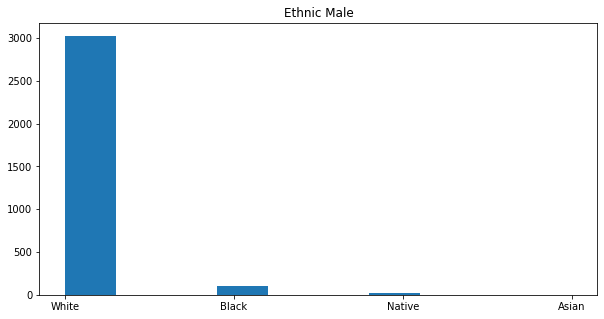

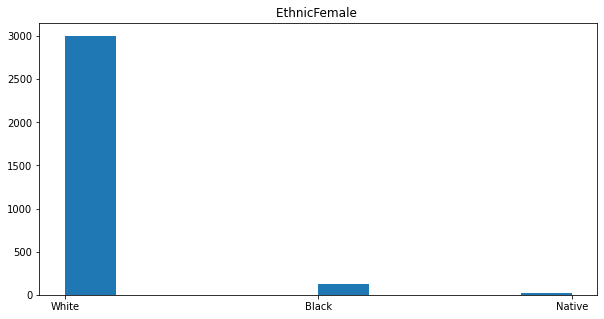

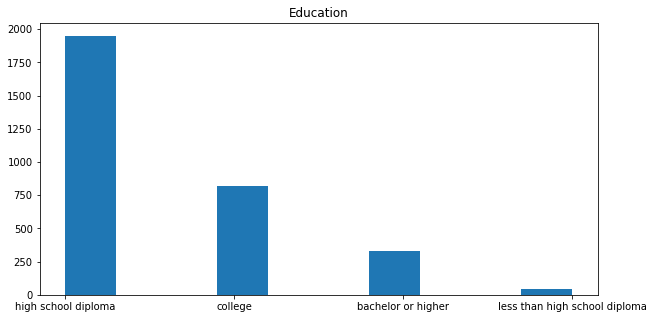

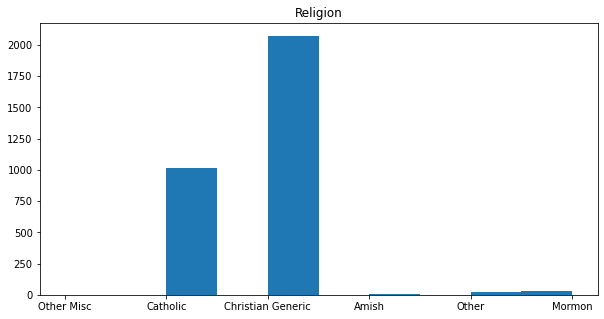

In [ ]:
# histogram
import matplotlib.pyplot as plt

plt.figure(1, figsize=(10,5))
plt.title('Ethnic Male')
plt.hist(newDf['EthnicMale'])

plt.figure(2, figsize=(10,5))
plt.title('EthnicFemale ')
plt.hist(newDf['EthnicFemale'])

plt.figure(3, figsize=(10,5))
plt.title('Education')
plt.hist(newDf['Education'])

plt.figure(4, figsize=(10,5))
plt.title('Religion')
plt.hist(newDf['Religion'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f4f960e9350>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4f960acc90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4f960b4c90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4f960b4cd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4f960e9310>,
  <matplotlib.lines.Line2D at 0x7f4f960accd0>]}

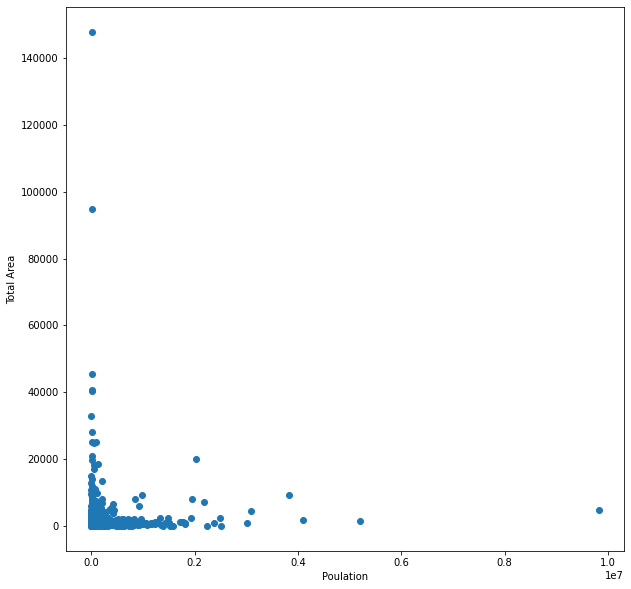

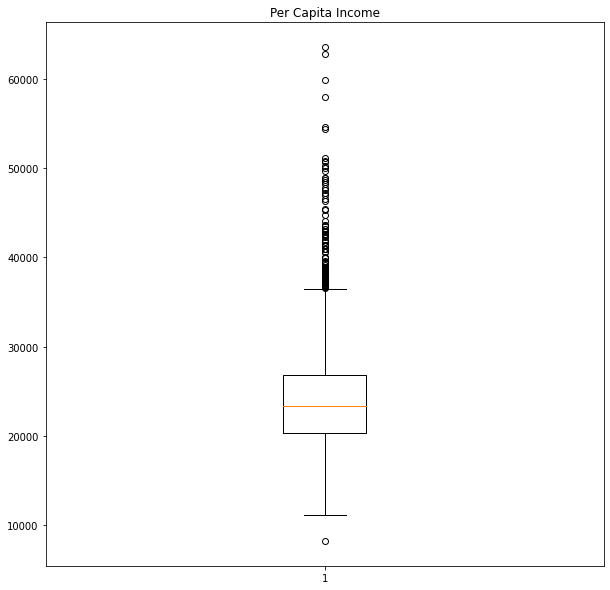

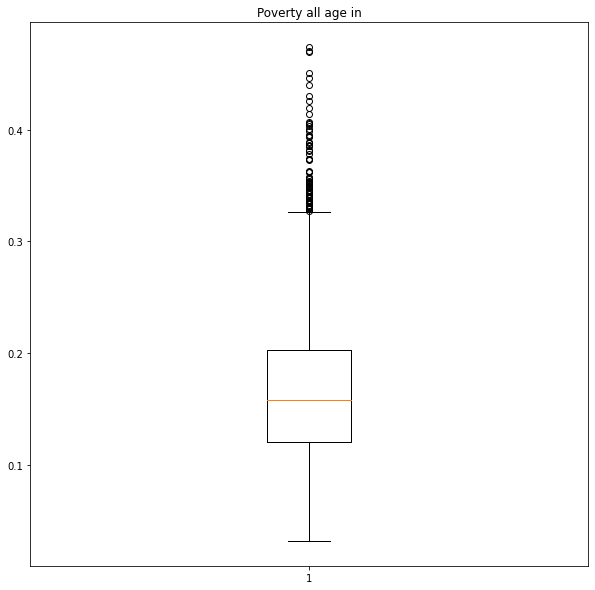

In [ ]:
# 2D Scatter plot

plt.figure(5, figsize=(10,10))
plt.xlabel('Poulation')
plt.ylabel('Total Area')
plt.scatter( newDf['Population'].astype(float).to_numpy(),newDf['TotalArea'].to_numpy())

plt.figure(6, figsize=(10,10))
plt.title('Per Capita Income')
plt.boxplot(newDf['PerCapitaInc'])

plt.figure(7, figsize=(10,10))
plt.title('Poverty all age in')
plt.boxplot(newDf['PovertyAllAgesPct2014'])

In [ ]:
cleanDf = newDf.drop(['Population','TotalArea','MedHHInc2014','PerCapitaInc','PopEstimate2015','PopDensity','NomalizePopEstimate2015' ], axis=1)

# Final cleaned data
cleanDf

,Votes,UnemploymentRate2015,PovertyAllAgesPct2014,DeepPovAll,AgeTotalPop,MaleRate,FemaleRate,TurnoutRate,Democrat,State,County,Education,Religion,Old,Young,Adult,EthnicMale,EthnicFemale,NomalizePopulation,NomalizeMedHHInc2014,NomalizePerCapitaInc,NomalizeToalArea,NomalizePopDensity
0,7471,0.032,0.162,0.049330,1143123.501,0.483100,0.498326,0.022362,0,02,013,high school diploma,Other Misc,0.096915,0.250370,0.584595,White,White,-0.303817,0.687669,0.536632,3.607604,-0.151766
1,7471,0.038,0.099,0.042878,1143123.501,0.483100,0.498326,0.013102,0,02,016,high school diploma,Catholic,0.096915,0.250370,0.584595,White,White,-0.296080,1.756284,1.515032,3.374070,-0.151244
2,7471,0.050,0.100,0.039032,1143123.501,0.483100,0.498326,0.000250,0,02,020,college,Christian Generic,0.096915,0.250370,0.584595,White,White,0.619196,2.319570,2.182969,0.196708,-0.052741
3,7471,0.144,0.238,0.086448,1143123.501,0.483100,0.498326,0.004163,0,02,050,high school diploma,Catholic,0.096915,0.250370,0.584595,White,White,-0.259464,-0.110505,-0.909921,11.578651,-0.151766
4,7471,0.092,0.095,0.048682,1143123.501,0.483100,0.498326,0.083756,0,02,060,college,Catholic,0.096915,0.250370,0.584595,White,White,-0.310672,2.333129,2.271372,-0.083883,-0.150838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,16661,0.046,0.098,0.059597,44626.000,0.518554,0.481446,0.003733,0,56,037,college,Catholic,0.060077,0.300968,0.607045,White,White,-0.173799,2.104938,1.129145,2.426424,-0.149562
3141,12176,0.038,0.077,0.031761,23125.000,0.516324,0.483676,0.005265,1,56,039,bachelor or higher,Catholic,0.076151,0.212065,0.668584,White,White,-0.245777,2.331807,3.431841,0.786238,-0.148925
3142,8053,0.049,0.100,0.068604,20822.000,0.502978,0.497022,0.003868,0,56,041,high school diploma,Mormon,0.071367,0.320094,0.565364,White,White,-0.246339,0.798293,0.300889,0.229792,-0.146142
3143,3715,0.040,0.126,0.055784,8328.000,0.509246,0.490754,0.004461,0,56,043,college,Christian Generic,0.141811,0.252882,0.538785,White,White,-0.286577,0.302389,0.501551,0.270343,-0.149794


In [ ]:
from google.colab import files

# referenced by https://stackoverflow.com/questions/48854943/how-can-i-download-a-pandas-dataframe-in-google-colab

cleanDf.to_csv('cleanDf.csv', index=False)
files.download('cleanDf.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Decision making

I think the label vector is `Democrat` column.

Because this is the only one discrete value which has two possibilities 0 or 1.

Morever, in election, what we want to predict and know is that which political party won in centain area. 